# 3.1 Imports

In [14]:
import torch
import torch.optim as optim
import mlflow
import mlflow.pytorch
import sys
sys.path.append("../src")
from data_utils import load_mnist_data
from models import PretrainedMobileNetForMNIST
from evaluation import evaluate, evaluate_metrics, visualize_errors
from training import train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


# 3.2 Chargement des données

In [2]:
data_dir = "./data"
labeled_loader, unlabeled_loader, test_loader = load_mnist_data(data_dir, labeled_fraction=0.1, batch_size=64)


# 3.3 Initialiser le modèle MobileNet adapté MNIST et envoyer sur device

In [3]:
model=PretrainedMobileNetForMNIST().to(device)

/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Paramètres d'entraînement

In [4]:
alpha = 1.0
epochs = 5
learning_rate=0.1

# Definir l'optimiseur

In [5]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# MLflow Tracking

In [6]:
mlflow.set_experiment("MNIST-VAT-MobileNet")  # Nom de l'expérience

<Experiment: artifact_location='file:///Users/aymanemimoun/Documents/M2%20Data%20Science/S1/ML/Deep%20Learning/Deep-Learning-VAT/Notebooks/mlruns/689059323732445441', creation_time=1752236231985, experiment_id='689059323732445441', last_update_time=1752236231985, lifecycle_stage='active', name='MNIST-VAT-MobileNet', tags={}>

# Training

In [7]:
train(
    model=model,
    labeled_loader=labeled_loader,
    unlabeled_loader=unlabeled_loader,
    optimizer=optimizer,
    alpha=alpha,
    epochs=epochs,
    device=device
)

Époque 1/5, Perte totale: 62.1373
Époque 2/5, Perte totale: 22.0900
Époque 3/5, Perte totale: 16.8853
Époque 4/5, Perte totale: 10.6271
Époque 5/5, Perte totale: 8.9283


# Évaluation du modèle sur le jeu de test

In [8]:
eval_vat=evaluate(model, test_loader)
eval_vat

Précision sur les données de test : 96.50%


In [11]:
conf_matrix, class_report=evaluate_metrics(model, test_loader)
conf_matrix

Matrice de Confusion :
 [[ 951    0    3    0    0    0   22    0    4    0]
 [   0 1124    1    4    0    0    1    4    1    0]
 [   3    5 1019    2    0    0    0    1    2    0]
 [   1    0    7  971    0   21    0    1    9    0]
 [   1    2    2    0  917    0    5   11    1   43]
 [   1    0    0    5    0  808    2    0   76    0]
 [   1    4    1    0    2    2  941    0    7    0]
 [   0    0    6   12    4    2    0  998    1    5]
 [   3    0    7    0    2    0    0    0  954    8]
 [   5    2    2   12    1    3    2    5   10  967]]

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.9845    0.9704    0.9774       980
           1     0.9886    0.9903    0.9894      1135
           2     0.9723    0.9874    0.9798      1032
           3     0.9652    0.9614    0.9633      1010
           4     0.9903    0.9338    0.9612       982
           5     0.9665    0.9058    0.9352       892
           6     0.9671    0.9823   

array([[ 951,    0,    3,    0,    0,    0,   22,    0,    4,    0],
       [   0, 1124,    1,    4,    0,    0,    1,    4,    1,    0],
       [   3,    5, 1019,    2,    0,    0,    0,    1,    2,    0],
       [   1,    0,    7,  971,    0,   21,    0,    1,    9,    0],
       [   1,    2,    2,    0,  917,    0,    5,   11,    1,   43],
       [   1,    0,    0,    5,    0,  808,    2,    0,   76,    0],
       [   1,    4,    1,    0,    2,    2,  941,    0,    7,    0],
       [   0,    0,    6,   12,    4,    2,    0,  998,    1,    5],
       [   3,    0,    7,    0,    2,    0,    0,    0,  954,    8],
       [   5,    2,    2,   12,    1,    3,    2,    5,   10,  967]])

# Visualisation des erreurs

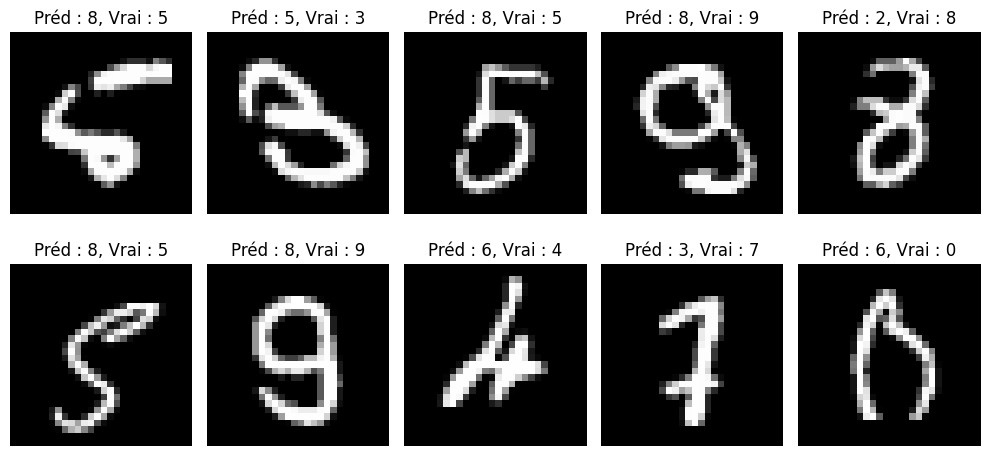

In [15]:
visualize_errors(model, test_loader)